# Machine Learning
# Logistic Regression and SoftMax for MNIST

## SoftMax regression

SoftMax regression: do a logical regression to more than two categories.

$$ p(y=i|x; W) = \frac{e^{\omega_i^T x}}{\sum_{j=0}^{\# labels} e^{\omega_j^T x}} $$

$$ y_{pred} = \mathrm{arg\ max}_i p(y=i|x)$$

## Numerical Experiments

Goal: study the MNIST problem using Logistic Regression

In [99]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
n_total = len(X)
print(n_total)

Automatically created module for IPython interactive environment
70000


In [4]:
# shuffle the data
# useless since it will be shuffled by train_test_split

In [32]:
# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=train_size,
                                                    test_size=test_size)

# scale data to have zero mean and unit variance 
# [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(penalty='l2', tol=0.1, C=1.0, solver='saga',
                         multi_class='multinomial')
# fit data
clf.fit(X_train, y_train)
# percentage of zero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 2636.112 s
Sparsity with L2 penalty: 8.55%
Test score with L2 penalty: 0.8856


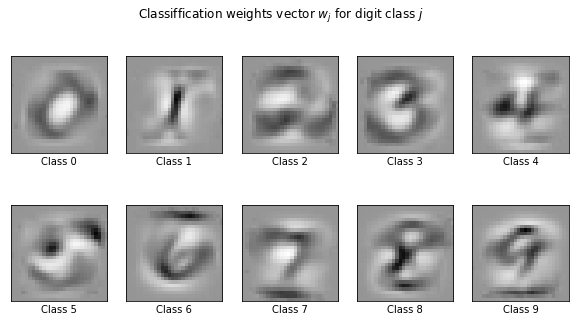

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights VS the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max() 
# extract the greater coefficient (weight) in absolute value 
# for scaling of the grey colormap
for i in range(10):
    l2_plot = plt.subplot(2, 5, i+1)
    # Three integers (nrows, ncols, index). 
    # The subplot will take the index position on a grid 
    # with nrows rows and ncols columns. 
    # index starts at 1 in the upper left corner 
    # and increases to the right. 
    # from plt.subplot documentation
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    # no ticks
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classiffication weights vector $w_j$ for digit class $j$')
plt.show()

Keep in mind that the classifier works on a 1D array. It doesn't know the spatial configuration.

## Exercices

- ####  Same thing with L1 Regularization

In [34]:
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
# apply logistic regressor with 'sag' solver, 
#C is the inverse regularization strength
clf_l1 = LogisticRegression(penalty='l1', tol=0.1, C=0.1, 
                            solver='liblinear')
# fit data
clf_l1.fit(X_train, y_train)
# percentage of zero weights
sparsity = np.mean(clf_l1.coef_ == 0) * 100
# compute accuracy
score = clf_l1.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Example run in 2656.786 s
Sparsity with L1 penalty: 37.93%
Test score with L1 penalty: 0.9110


Remark: sparcity increases, as expected.

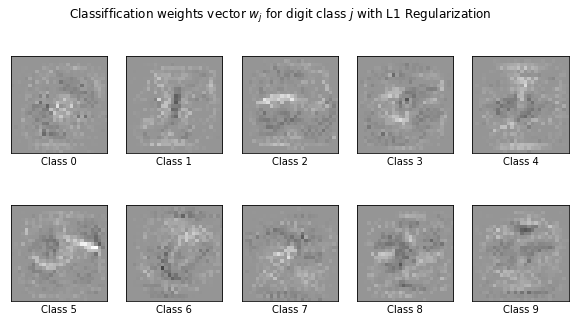

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights VS the pixel position
coef_l1 = clf_l1.coef_.copy()
plt.figure(figsize=(10, 5))
scale_l1 = np.abs(coef_l1).max() 
# extract the greater coefficient (weight) in absolute value 
# for scaling of the grey colormap
for i in range(10):
    l1_plot = plt.subplot(2, 5, i+1)
    # Three integers (nrows, ncols, index). 
    # The subplot will take the index position on a grid 
    # with nrows rows and ncols columns. 
    # index starts at 1 in the upper left corner 
    # and increases to the right. 
    # from plt.subplot documentation
    l1_plot.imshow(coef_l1[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale_l1, vmax=scale_l1)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    # no ticks
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classiffication weights vector $w_j$ for digit class $j$ with L1 Regularization')
plt.show()

medium grey: coefficient = 0

- #### Misclassified samples

from the classifier using L1 Regression

In [56]:
misclassified_indexes = np.where(y_train != clf.predict(X_train))

from random import sample
nums=sample(list(misclassified_indexes[0]),4)

mislabels = clf.predict(X_train)[nums]
print(mislabels)

['1' '6' '0' '0']


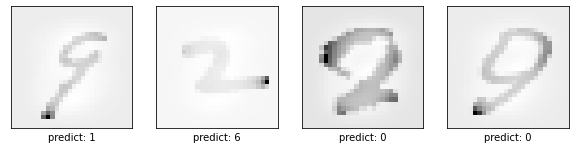

In [57]:
plt.figure(figsize=(10, 5))
for i in range(4):
    subplt = plt.subplot(1, 4, i+1)
    subplt.imshow(X_train[nums[i]].reshape(28, 28), cmap=plt.cm.Greys)
    subplt.set_xticks(())
    subplt.set_yticks(())
    subplt.set_xlabel("predict: %s" % mislabels[i])

Dark zones must match high valued coefficients, White zones must match nearly null coefficients.

- #### Accuracy w.r.t. training set size

In [105]:
test_score_list = []
train_size_list = sample(np.arange(0, n_total), 50)
print(train_size_list)

TypeError: Population must be a sequence or set.  For dicts, use list(d).

In [101]:
for train_size in train_size_list:
    test_size = n_total - train_size

    # create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=train_size,
                                                    test_size=test_size)
    
    # re-scaling the data  
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # classifier
    clf = LogisticRegression(penalty='l2', tol=0.1, C=1e5, solver='saga',
                         multi_class='multinomial')
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("Train size: {} -- test score: {}".format(train_size, 
                                                    test_score))
    test_score_list.append(test_score)

ValueError: test_size=70000 should be either positive and smaller than the number of samples 70000 or a float in the (0, 1) range

Text(0.5, 1.0, 'Accuracy w.r.t. Training set size')

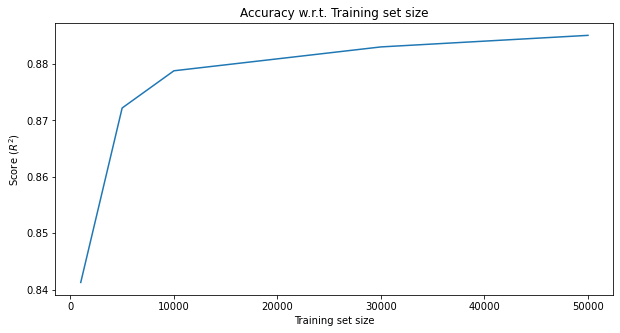

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(train_size_list, test_score_list)
plt.xlabel('Training set size')
plt.ylabel('Score ($R^2$)')
plt.title("Accuracy w.r.t. Training set size")